## Подготовка данных

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [111]:
data = pd.read_csv('./train.csv')
print(data.shape, "- Размерность датасета")
data.head()

(5282, 20) - Размерность датасета


,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


Посмотрим количество объектов типа NaN

In [112]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

Видно, что объекты типа NaN отсутствуют

### Загрузка данных:

In [113]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

Чтобы была возможность как-то проверить качество модели до отправки на kaggle, я разделю обучающую выборку на train и valid, а уже датасет, результаты предсказания на котором я буду отправлять на kaggle, я потом назову X_submission

In [114]:
X = data[feature_cols]
y = data[target_col]

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

### Анализ данных:

Для числовых признаков построим гистограммы распределения признаков:

При построении гистограммы для числового признака TotalSpent было замечено, что что-то не так, при исследовании ситуации я определил, что не все объекты там могли преобразоваться к типу float, поскольку значение в них было " ". Произведем отлов таких строчек и в зависимости от их количества будем решать, что с ними делать:

In [158]:
X.loc[X.TotalSpent == " " , 'TotalSpent'] = "0"
X = X.astype(
    {'ClientPeriod': float, 'MonthlySpending': float, 'TotalSpent': float}
)

Таких строчек вышло всего 9 штук, я решил заменить " " на нули в этих строчках

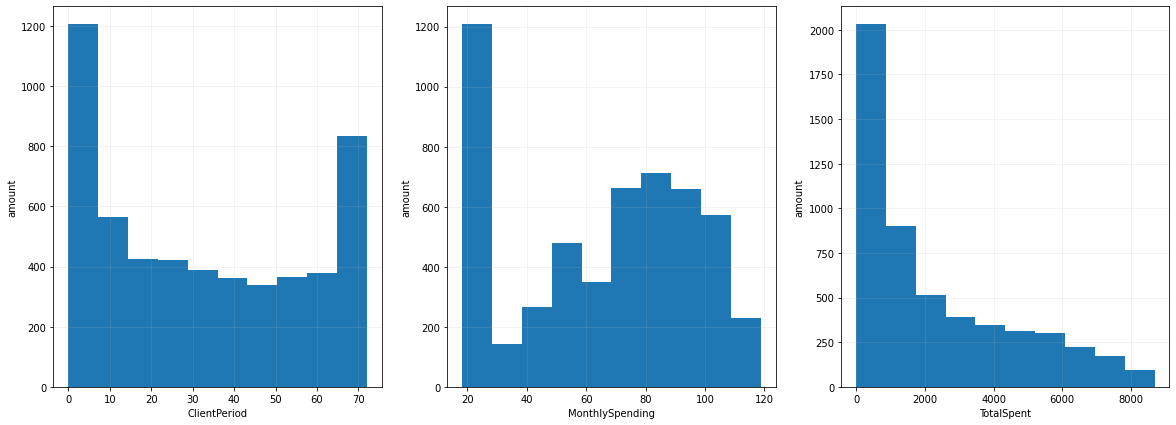

In [159]:
plt.figure(figsize=(20, 7))

sp = None
for num_col in num_cols:
    sp = plt.subplot(1, 3, num_cols.index(num_col) + 1)

    plt.hist(X[num_col])

    plt.ylabel("amount")
    plt.xlabel(num_col)
    plt.grid(alpha=0.2)

plt.show()

Видно, что числовые признаки хорошо распределены - они принимают множество различных значений, а не сосредоточены в одном месте

Для категориальных признаков посмотрим какое количество возможных значений имеет каждый признак:

In [117]:
for cat_col in cat_cols:
    print(
        f'{cat_col} : {X[cat_col].unique()}, различных : {len(X[cat_col].unique())}'
    )

Sex : ['Male' 'Female'], различных : 2
IsSeniorCitizen : [0 1], различных : 2
HasPartner : ['Yes' 'No'], различных : 2
HasChild : ['Yes' 'No'], различных : 2
HasPhoneService : ['Yes' 'No'], различных : 2
HasMultiplePhoneNumbers : ['No' 'Yes' 'No phone service'], различных : 3
HasInternetService : ['No' 'Fiber optic' 'DSL'], различных : 3
HasOnlineSecurityService : ['No internet service' 'No' 'Yes'], различных : 3
HasOnlineBackup : ['No internet service' 'No' 'Yes'], различных : 3
HasDeviceProtection : ['No internet service' 'No' 'Yes'], различных : 3
HasTechSupportAccess : ['No internet service' 'Yes' 'No'], различных : 3
HasOnlineTV : ['No internet service' 'No' 'Yes'], различных : 3
HasMovieSubscription : ['No internet service' 'No' 'Yes'], различных : 3
HasContractPhone : ['One year' 'Two year' 'Month-to-month'], различных : 3
IsBillingPaperless : ['No' 'Yes'], различных : 2
PaymentMethod : ['Mailed check' 'Credit card (automatic)' 'Electronic check'
 'Bank transfer (automatic)'], р

Построим диаграммы распределения для категориальных признаков:

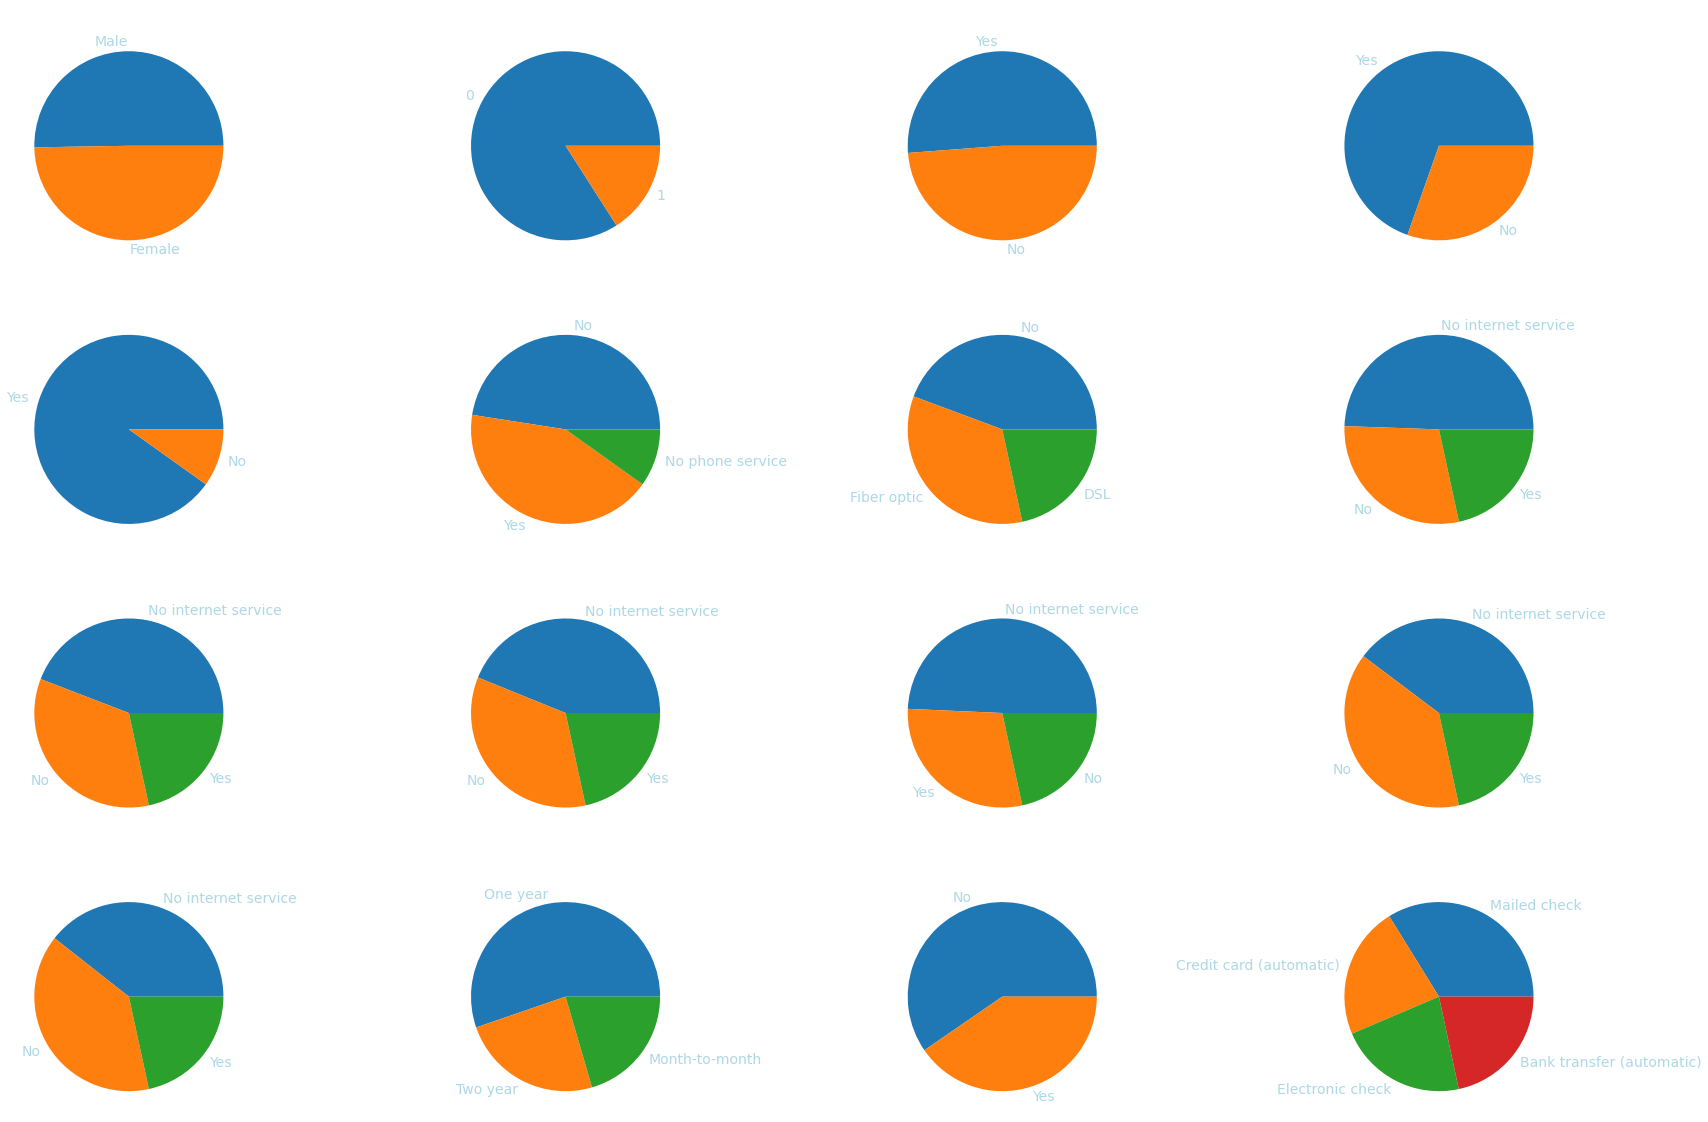

In [172]:
sp = None
plt.figure(figsize=(30, 20))
for cat_col in cat_cols:
    sp = plt.subplot(4, 4, cat_cols.index(cat_col) + 1)
    my_labels = X[cat_col].unique()
    my_values = X[cat_col].value_counts()
    plt.title(cat_col, fontdict={'fontsize': 20, 'color': 'w'})
    plt.pie(my_values, labels=my_labels, textprops={'color' : 'lightblue', 'fontsize' : 14})
plt.show()
None

Посмотрим на распределение целевой переменной:

3898 - Количество объектов с меткой 0
 1384 - Количество объектов с метой 1
Количество объектов 0 класса примерно в 3 раза превышает количество объектов класса 1 - можно считать, что выборка сбалансирована 


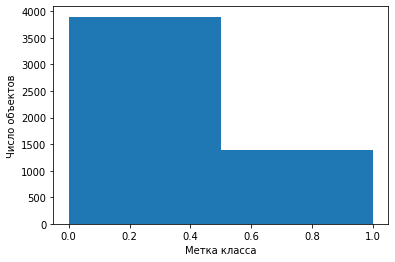

In [119]:
plt.xlabel('Метка класса')
plt.ylabel('Число объектов')
plt.hist(y, bins=2)
print(
    len(y.loc[y == 0]), "- Количество объектов с меткой 0\n",
    len(y.loc[y == 1]), "- Количество объектов с меткой 1"
)
print(
    "Количество объектов 0 класса примерно в 3 раза превышает количество объектов класса 1 - можно считать, что выборка сбалансирована "
)

В качестве дополнительного пункта я решил посмотреть на вид матрицы линейной корелляции, по ее виду можно сразу понять, что линейная модель может показать довольно хороший результат

In [173]:
X[num_cols].corr()

,ClientPeriod,MonthlySpending,TotalSpent
ClientPeriod,1.000000,0.249414,0.826658
MonthlySpending,0.249414,1.000000,0.652014
TotalSpent,0.826658,0.652014,1.000000


Видно, что ClientPerid довольно хорошо коррелирует с TotalSpent, так что можно надеяться на неплохой результат для линейной модели

## Применение линейной модели

In [178]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer

Построим пайплайн из необходимых обработок данных и логистической регрессии, затем подберем оптимальные гиперпараметры через GridSearchCV и произведем оценку качества модели

In [196]:
# Создаем отдельно обработчик данных, который будет стандартизировать числовые признаки и one-hot кодировать категориальные
col_transformer = make_column_transformer(
          #(StandardScaler(), num_cols),
          #(LabelEncoder(), cat_cols),
          (OneHotEncoder(), cat_cols)
     )
s_sc = StandardScaler()     

In [198]:
s_sc.fit(X)

ValueError: could not convert string to float: 'Male'